In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
installments = pd.read_csv("C:/final/home-credit-default-risk/installments_payments.csv")

In [3]:
installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [4]:
installments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
SK_ID_PREV                int64
SK_ID_CURR                int64
NUM_INSTALMENT_VERSION    float64
NUM_INSTALMENT_NUMBER     int64
DAYS_INSTALMENT           float64
DAYS_ENTRY_PAYMENT        float64
AMT_INSTALMENT            float64
AMT_PAYMENT               float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [5]:
installments.describe()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [6]:
installments.isna().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [7]:
installments.isna().sum()/installments.shape[0] # na占比很低

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NUM_INSTALMENT_VERSION    0.000000
NUM_INSTALMENT_NUMBER     0.000000
DAYS_INSTALMENT           0.000000
DAYS_ENTRY_PAYMENT        0.000214
AMT_INSTALMENT            0.000000
AMT_PAYMENT               0.000214
dtype: float64

In [8]:
installments.apply(lambda x:x.unique().shape[0]) # SK_ID_PREV有重複值

SK_ID_PREV                997752
SK_ID_CURR                339587
NUM_INSTALMENT_VERSION        65
NUM_INSTALMENT_NUMBER        277
DAYS_INSTALMENT             2922
DAYS_ENTRY_PAYMENT          3040
AMT_INSTALMENT            902539
AMT_PAYMENT               944236
dtype: int64

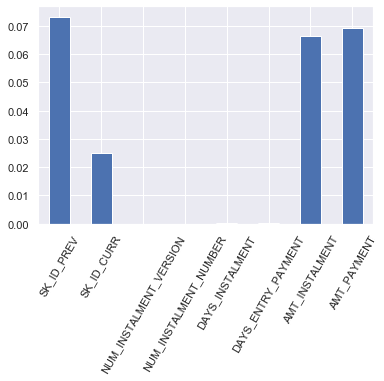

In [9]:
(installments.apply(lambda x:x.unique().shape[0])/installments.shape[0]).plot(kind='bar',rot=60) 
# SK_ID_PREV 的unique值僅占資料筆數7%

In [10]:
installments.groupby('SK_ID_PREV').size()

SK_ID_PREV
1000001     2
1000002     4
1000003     3
1000004     7
1000005    11
           ..
2843495     7
2843496    34
2843497    20
2843498     6
2843499    10
Length: 997752, dtype: int64

In [12]:
installments.loc[installments['SK_ID_PREV']==1000005] # 看起來是由 NUM_INSTALMENT_NUMBER 紀錄每筆貸款的每次還款狀況

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
109820,1000005,176456,1.0,2,-1658.0,-1664.0,14713.605,14713.605
632811,1000005,176456,1.0,8,-1478.0,-1484.0,14713.605,14713.605
1310691,1000005,176456,1.0,1,-1688.0,-1687.0,14713.605,14713.605
1740975,1000005,176456,1.0,9,-1448.0,-1445.0,14713.605,14710.815
1886086,1000005,176456,1.0,10,-1418.0,-1433.0,14599.260,14599.260
2170925,1000005,176456,1.0,4,-1598.0,-1606.0,14713.605,14713.605
2255181,1000005,176456,1.0,3,-1628.0,-1636.0,14713.605,14713.605
2612194,1000005,176456,1.0,5,-1568.0,-1575.0,14713.605,14713.605
2618814,1000005,176456,1.0,9,-1448.0,-1484.0,14713.605,2.790
2892901,1000005,176456,1.0,7,-1508.0,-1512.0,14713.605,14713.605


In [39]:
assert installments.groupby('SK_ID_PREV')['NUM_INSTALMENT_NUMBER'].count().sum() == installments.shape[0]

In [37]:
installments.groupby(['SK_ID_PREV','NUM_INSTALMENT_NUMBER'])['NUM_INSTALMENT_NUMBER'].count()

SK_ID_PREV  NUM_INSTALMENT_NUMBER
1000001     1                        1
            2                        1
1000002     1                        1
            2                        1
            3                        1
                                    ..
2843499     6                        1
            7                        1
            8                        1
            9                        1
            10                       1
Name: NUM_INSTALMENT_NUMBER, Length: 12861994, dtype: int64

In [45]:
(installments.groupby(['SK_ID_PREV','NUM_INSTALMENT_NUMBER'])['NUM_INSTALMENT_NUMBER'].count() == 2).sum()
# 同個貸款編號，付款期數有重複，要怎麼挑出這幾筆？

718890

In [43]:
installments.shape[0]

13605401